In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
from tabulate import tabulate
import ipywidgets as widgets
%matplotlib inline

In [2]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           #'compression': 'gzip',
           'encoding': 'utf-8'}

In [3]:
with open('../hand/removal_dtypes.yaml', 'r') as yamlfile:
        removal_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [4]:
removals = pd.read_csv('../input/removals.csv', **csv_opts, dtype=removal_dtypes)

In [5]:
removals['departed_date'] = pd.to_datetime(removals['departed_date'], format='%m/%d/%Y')
removals['removal_date'] = pd.to_datetime(removals['removal_date'], format='%m/%d/%Y')

# Overview

In [6]:
removals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963972 entries, 0 to 963971
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   aor                          963972 non-null  category      
 1   apprehension_date            949737 non-null  object        
 2   processing_disposition_code  958257 non-null  category      
 3   citizenship                  963972 non-null  category      
 4   gender                       963972 non-null  category      
 5   rc_threat_level              542478 non-null  object        
 6   final_charge_section         962328 non-null  category      
 7   departed_date                963972 non-null  datetime64[ns]
 8   removal_date                 963972 non-null  datetime64[ns]
 9   id                           963972 non-null  int64         
dtypes: category(5), datetime64[ns](2), int64(1), object(2)
memory usage: 42.3+ MB


In [7]:
removals.head()

,aor,apprehension_date,processing_disposition_code,citizenship,gender,rc_threat_level,final_charge_section,departed_date,removal_date,id
0,NOL,8/26/2015,ADMDPT,GUATEMALA,Male,(B)(7)(E),237a2Aiii,2015-10-01,2015-10-01,0
1,DAL,NaN,REINST,MEXICO,Male,(B)(7)(E),212a9Aii,2015-10-01,2015-10-01,1
2,DAL,6/19/2015,REINST,MEXICO,Male,(B)(7)(E),212a9CiII,2015-10-01,2015-10-01,2
3,SNA,8/21/2015,REINST,HONDURAS,Male,(B)(7)(E),212a9Aii,2015-10-01,2015-10-01,3
4,HOU,9/28/2015,REINST,MEXICO,Male,(B)(7)(E),212a9CiII,2015-10-01,2015-10-01,4


# Null Values

In [8]:
# table for removals
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', "{:,}".format(sum(pd.isnull(removals.aor))), str(round(sum(pd.isnull(removals.aor)) / len(removals) * 100, 2)) +'%'], 
              ['Apprehension Date', "{:,}".format(sum(pd.isnull(removals.apprehension_date))), str(round(sum(pd.isnull(removals.apprehension_date)) / len(removals) * 100, 2)) +'%'], 
              ['Processing Disposition Code', "{:,}".format(sum(pd.isnull(removals.processing_disposition_code))), str(round(sum(pd.isnull(removals.processing_disposition_code)) / len(removals) * 100, 2)) +'%'], 
              ['Citizenship', "{:,}".format(sum(pd.isnull(removals.citizenship))), str(round(sum(pd.isnull(removals.citizenship)) / len(removals) * 100, 2)) +'%'],
              ['Gender', "{:,}".format(sum(pd.isnull(removals.gender))), str(round(sum(pd.isnull(removals.gender)) / len(removals) * 100, 2)) +'%'],
              ['RC Threat Level', "{:,}".format(sum(pd.isnull(removals.rc_threat_level))), str(round(sum(pd.isnull(removals.rc_threat_level)) / len(removals) * 100, 2)) +'%'],
              ['Final Charge Section', "{:,}".format(sum(pd.isnull(removals.final_charge_section))), str(round(sum(pd.isnull(removals.final_charge_section)) / len(removals) * 100, 2)) +'%'],
              ['Departed Date', "{:,}".format(sum(pd.isnull(removals.departed_date))), str(round(sum(pd.isnull(removals.departed_date)) / len(removals) * 100, 2)) +'%'],
              ['Removal Date', "{:,}".format(sum(pd.isnull(removals.removal_date))), str(round(sum(pd.isnull(removals.removal_date)) / len(removals) * 100, 2)) +'%'],
             ]


print('')
print('Null values for Removals data (total = 963,972)')
print(tabulate(null_table, headers='firstrow', tablefmt='fancy_grid', stralign='center', numalign='center'))


Null values for Removals data (total = 963,972)
╒═════════════════════════════╤═════════╤═════════╕
│          Variable           │   NaN   │  % Nan  │
╞═════════════════════════════╪═════════╪═════════╡
│             AOR             │    0    │  0.0%   │
├─────────────────────────────┼─────────┼─────────┤
│      Apprehension Date      │ 14,235  │  1.48%  │
├─────────────────────────────┼─────────┼─────────┤
│ Processing Disposition Code │  5,715  │  0.59%  │
├─────────────────────────────┼─────────┼─────────┤
│         Citizenship         │    0    │  0.0%   │
├─────────────────────────────┼─────────┼─────────┤
│           Gender            │    0    │  0.0%   │
├─────────────────────────────┼─────────┼─────────┤
│       RC Threat Level       │ 421,494 │ 43.72%  │
├─────────────────────────────┼─────────┼─────────┤
│    Final Charge Section     │  1,644  │  0.17%  │
├─────────────────────────────┼─────────┼─────────┤
│        Departed Date        │    0    │  0.0%   │
├──────────────

# Apprehension Date

removal_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
aor,,,,
SNA,"72,597","55,313","62,363","57,190"
PHO,"21,984","20,786","26,899","31,232"
SND,"23,729","20,945","26,917","21,097"
ELP,"43,590","21,420","21,149","18,594"
HOU,"14,681","13,598","15,899","17,194"
DAL,"12,154","14,028","14,818","13,676"
ATL,"5,770","12,571","13,727","13,061"
NOL,"4,778","9,471","10,763","11,844"
MIA,"5,562","7,082","8,091","8,830"


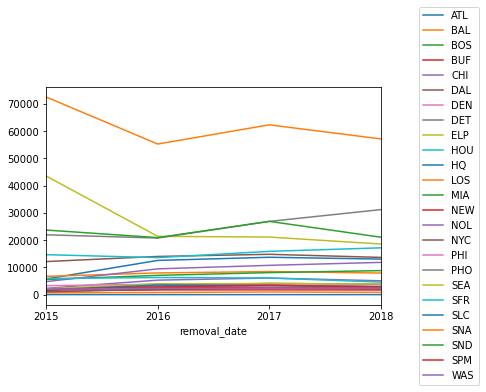

In [9]:
removals_by_fy = removals[["aor", "removal_date", "id"]]
removals_by_fy = removals_by_fy.groupby(["aor", "removal_date"], as_index=False)['id'].count()
removals_by_fy = removals_by_fy.pivot(index='removal_date', columns='aor', values='id')
removals_by_fy = removals_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()
removals_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
removals_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

# Citizenship

In [12]:
rem_cit = removals.citizenship.value_counts(normalize=True).to_frame()
rem_cit.columns = ["removals"]
rem_cit = rem_cit*100
rem_cit = rem_cit.round(decimals=2)
rem_cit = rem_cit.sort_values(by = ['removals'], ascending=False)
rem_cit = rem_cit.astype(str) + '%'
rem_cit

,removals
MEXICO,55.44%
GUATEMALA,17.55%
HONDURAS,11.49%
EL SALVADOR,7.43%
DOMINICAN REPUBLIC,0.79%
...,...
NORWAY,0.0%
LIBYA,0.0%
PARAGUAY,0.0%
AUSTRIA,0.0%
